<a href="https://colab.research.google.com/github/parshvak26/Basic-of-visualization-in-python/blob/main/Basic_of_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter projects/Global terrorism data EDA/Global Terrorism Data.csv', encoding='ISO-8859-1')


<ipython-input-6-141f16af0241>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/AlmaBetter projects/Global terrorism data EDA/Global Terrorism Data.csv', encoding='ISO-8859-1')


In [8]:
pd.set_option('display.max_columns', None)

In [10]:
df.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [12]:
# List of columns to keep (adjust as needed)
columns_to_keep = ['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'summary', 'gname']

# Drop the unnecessary columns
df = df[columns_to_keep]


In [13]:
df.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,summary,gname
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,MANO-D
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,23rd of September Communist League
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,Unknown
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,Unknown
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,Unknown


#Visualization

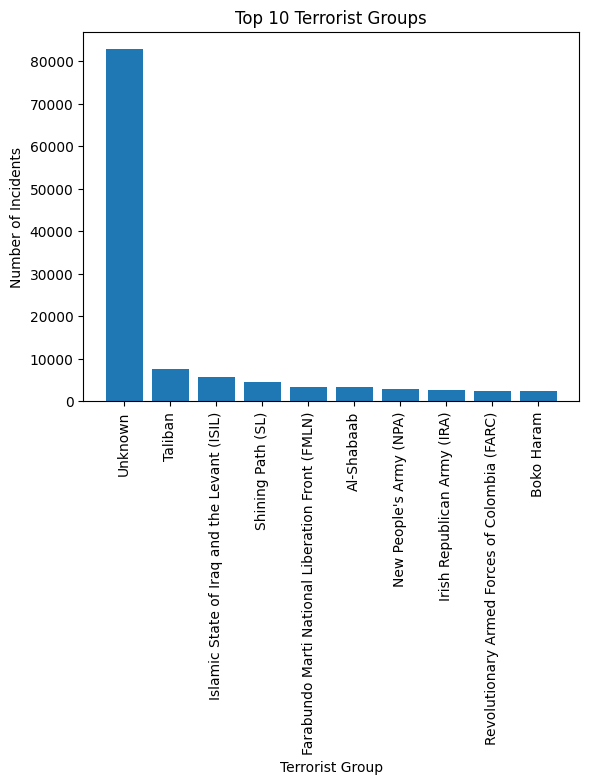

In [14]:
import matplotlib.pyplot as plt

group_counts = df['gname'].value_counts().head(10)
plt.bar(group_counts.index, group_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Incidents')
plt.title('Top 10 Terrorist Groups')
plt.show()

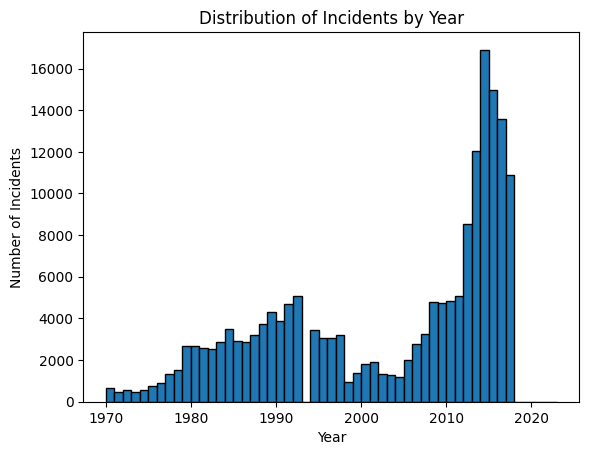

In [15]:
plt.hist(df['iyear'], bins=range(1970, 2024), edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Incidents by Year')
plt.show()


In [17]:
import folium

# Filter out rows with missing latitude and longitude values
filtered_df = df.dropna(subset=['latitude', 'longitude'])

# Create a base map
m = folium.Map(location=[filtered_df['latitude'].mean(), filtered_df['longitude'].mean()], zoom_start=2)

# Add markers for each incident
for index, row in filtered_df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['summary']).add_to(m)

m.save('incident_map.html')


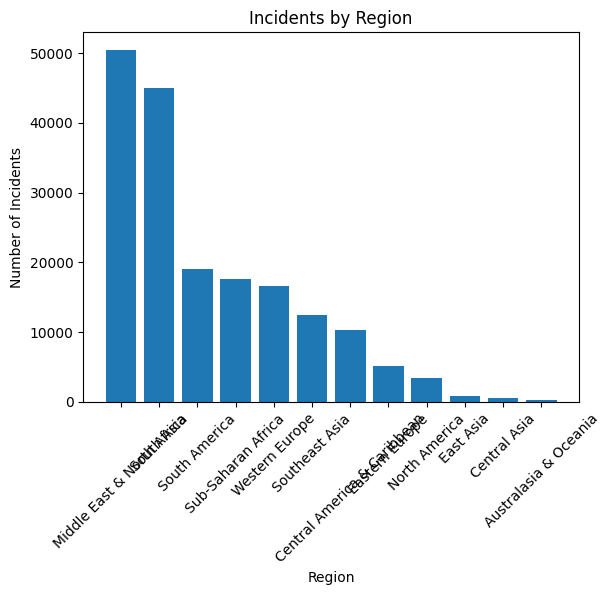

In [18]:
region_counts = df['region_txt'].value_counts()
plt.bar(region_counts.index, region_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Number of Incidents')
plt.title('Incidents by Region')
plt.show()


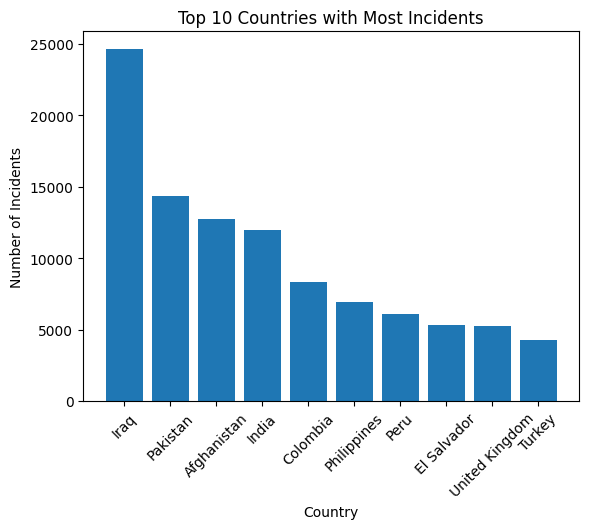

In [19]:
country_counts = df['country_txt'].value_counts().head(10)
plt.bar(country_counts.index, country_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.title('Top 10 Countries with Most Incidents')
plt.show()


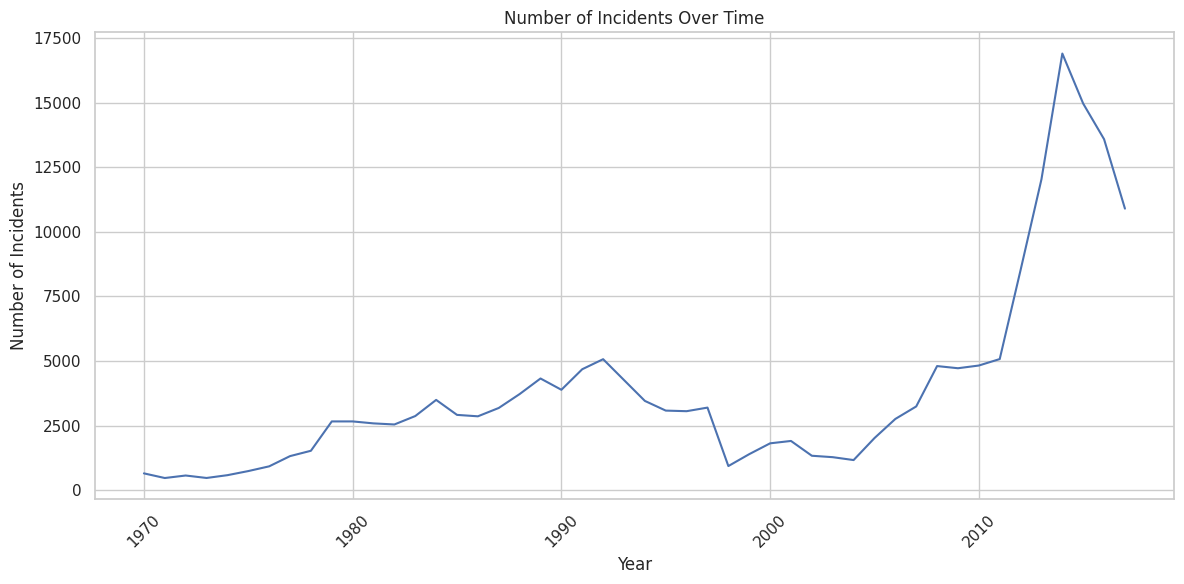

In [20]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="iyear", y="eventid", data=df.groupby("iyear").count().reset_index())
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.title("Number of Incidents Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


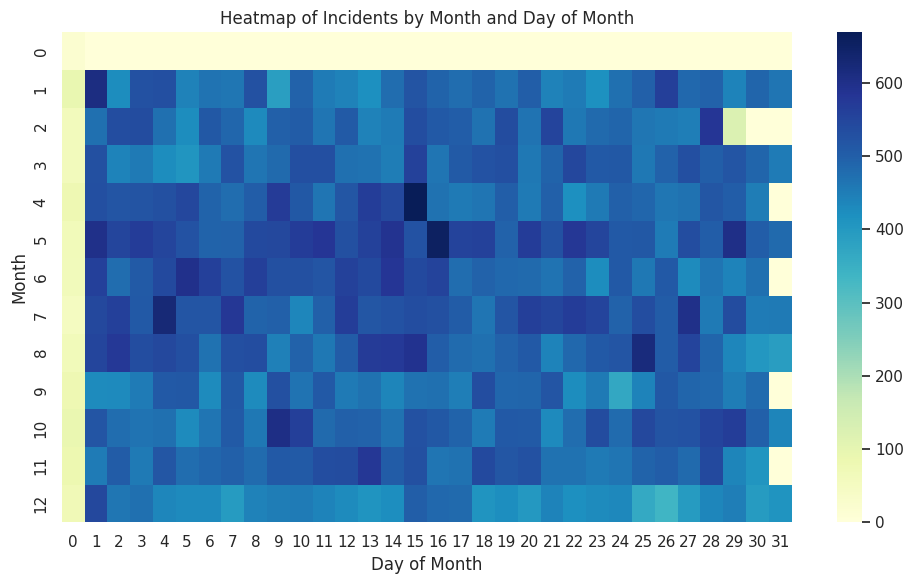

In [21]:
import numpy as np

monthly_day_counts = df.pivot_table(index="imonth", columns="iday", values="eventid", aggfunc="count", fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_day_counts, cmap="YlGnBu")
plt.xlabel("Day of Month")
plt.ylabel("Month")
plt.title("Heatmap of Incidents by Month and Day of Month")
plt.tight_layout()
plt.show()
